<span style="font-family: Trebuchet MS; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Project: International Traffic Signal

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Reading dataset - We have dataset as pickles

In [1]:
import pandas as pd
import numpy as np
import pickle
import logging

In [2]:
with open('./train.p', mode='rb') as train_p:
    train_dataset = pickle.load(train_p)
    
with open('./test.p', mode='rb') as test_p:
    test_dataset = pickle.load(test_p)
    
with open('./valid.p', mode='rb') as val_p:
    val_dataset = pickle.load(val_p)

In [3]:
val_dataset

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange">The dataset has three attributes
<li>Labels </li> <li>coords</li><li>Features</li>

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Print shape of dataset and total size

In [4]:
print(f"Traing Dataset => Features {train_dataset['features'].shape} \
      Labels {train_dataset['labels'].shape} \
      Coordinates {train_dataset['coords'].shape}")
print(f"Testing Dataset => Features {test_dataset['features'].shape} \
      Labels {test_dataset['labels'].shape} \
      Coordinates {test_dataset['coords'].shape}")
print(f"Validation Dataset => Features {val_dataset['features'].shape} \
      Labels {val_dataset['labels'].shape} \
      Coordinates {val_dataset['coords'].shape}")

Traing Dataset => Features (34799, 32, 32, 3)       Labels (34799,)       Coordinates (34799, 4)
Testing Dataset => Features (12630, 32, 32, 3)       Labels (12630,)       Coordinates (12630, 4)
Validation Dataset => Features (4410, 32, 32, 3)       Labels (4410,)       Coordinates (4410, 4)


In [5]:
print(f"Total dataset size is {np.sum(train_dataset['features'].shape[0] + test_dataset['features'].shape[0] + val_dataset['features'].shape[0])}")

Total dataset size is 51839


In [6]:
x_train, y_train = train_dataset['features'], train_dataset['labels']
x_test, y_test = test_dataset['features'], test_dataset['labels']
x_val, y_val = val_dataset['features'], val_dataset['labels']

In [7]:
x_train

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [8]:
len(np.unique(y_train))

43

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Visualize it - Check if have good data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check data distribution

E:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

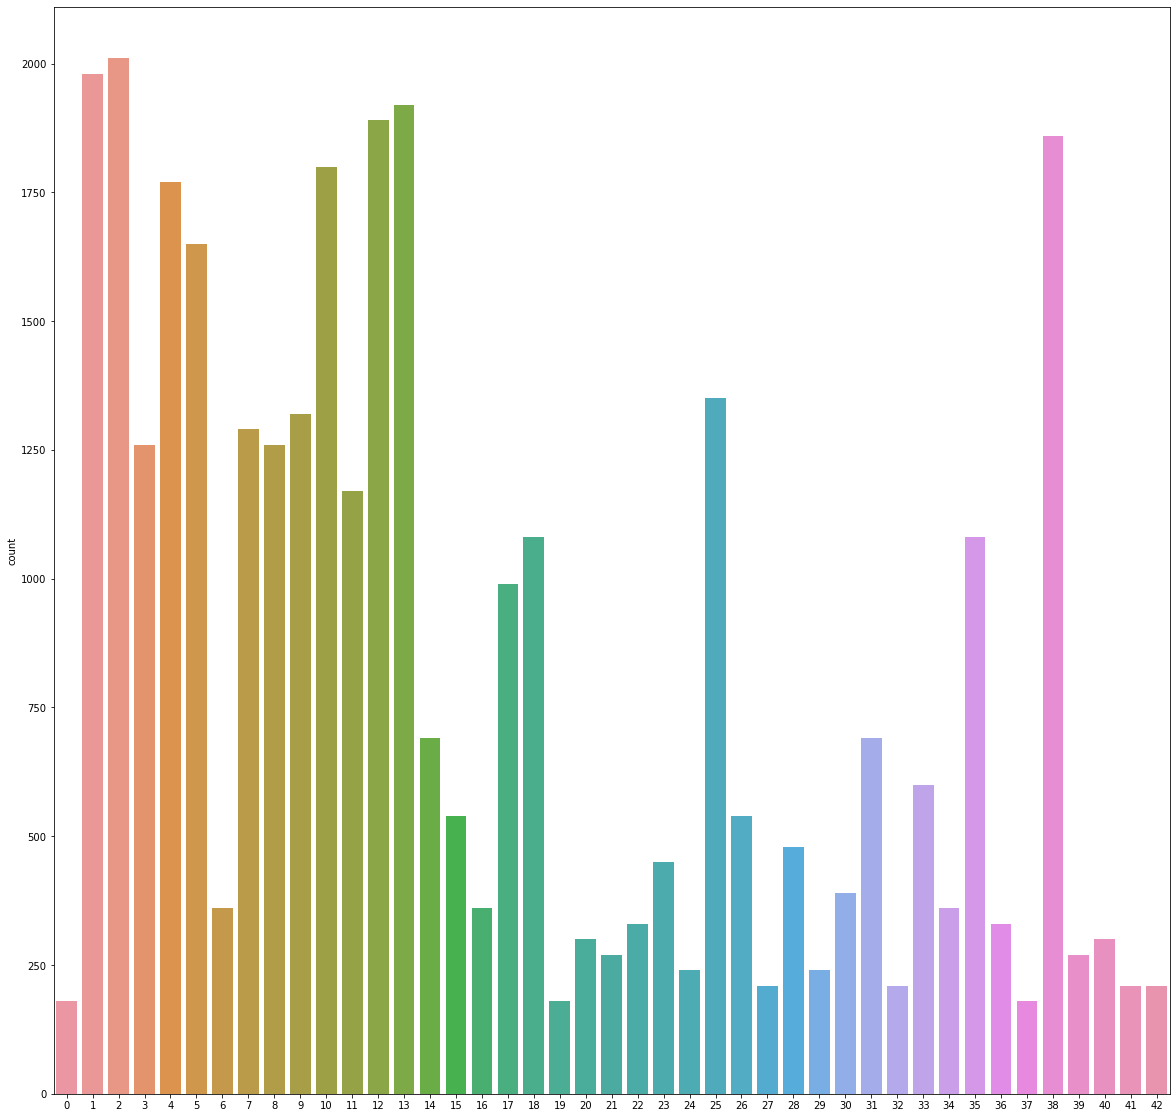

In [10]:
plt.figure(figsize=(20,20))
sns.countplot(y_train)

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check Few sign

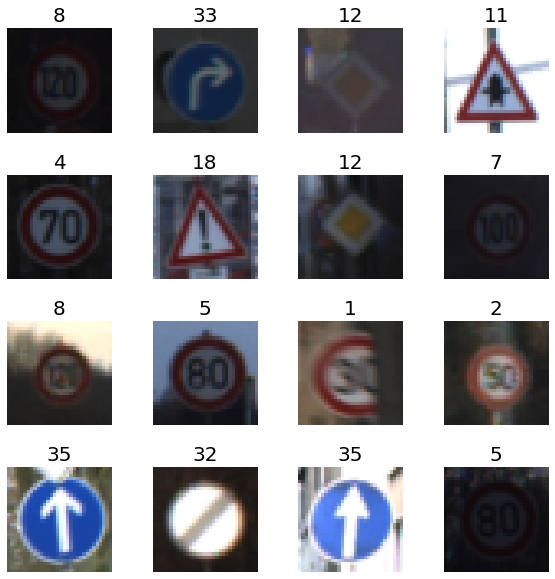

In [11]:
h_grid = 4
w_grid = 4

fig, axes = plt.subplots(h_grid, w_grid, figsize=(10,10))
axes = axes.ravel()

x_train_length = len(x_train)

for i in np.arange(0, w_grid * w_grid):
    number = np.random.randint(0, x_train_length)
    axes[i].imshow(x_train[number])
    axes[i].set_title(y_train[number], fontsize = 20)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Normalization

In [12]:
from sklearn.utils import shuffle

In [13]:
x_train, y_train = shuffle(x_train, y_train)

In [14]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_val_gray = np.sum(x_val/3, axis=3, keepdims=True)

In [15]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_val_gray_norm = (x_val_gray - 128)/128

In [16]:
x_train_gray_norm

array([[[[-0.43229167],
         [-0.43229167],
         [-0.42447917],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[-0.46614583],
         [-0.46354167],
         [-0.4609375 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[-0.47135417],
         [-0.46875   ],
         [-0.46614583],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[ 0.02083333],
         [-0.06770833],
         [-0.18489583],
         ...,
         [-0.61197917],
         [-0.58854167],
         [-0.56770833]],

        [[-0.359375  ],
         [-0.3984375 ],
         [-0.43489583],
         ...,
         [-0.55989583],
         [-0.53385417],
         [-0.52864583]],

        [[-0.52083333],
         [-0.53385417],
         [-0.52864583],
         ...,
         [-0.61197917],
         [-0.56770833],
         [-0.53385417]]],


       [[[-0.64583333],


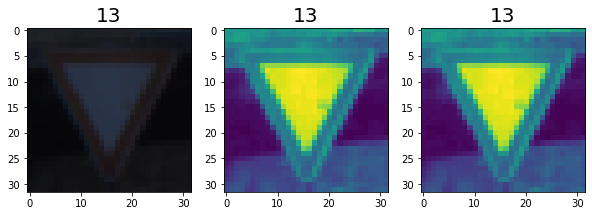

In [17]:
number = np.random.randint(0, x_train_length)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
plt.sca(axes[0]); 
plt.imshow(x_train[number]); 
plt.title(y_train[number], fontsize = 20)
plt.sca(axes[1]); 
plt.imshow(x_train_gray[number]); 
plt.title(y_train[number], fontsize = 20)
plt.sca(axes[2]); 
plt.imshow(x_train_gray_norm[number]); 
plt.title(y_train[number], fontsize = 20)

plt.show()

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Building CNN

In [69]:
from tensorflow.keras import layers, models, datasets 

In [19]:
cnn_seq = models.Sequential()

cnn_seq.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
cnn_seq.add(layers.AveragePooling2D())

cnn_seq.add(layers.Dropout(0.2))

cnn_seq.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq.add(layers.AveragePooling2D())

cnn_seq.add(layers.Flatten())

cnn_seq.add(layers.Dense(120, activation='relu'))
cnn_seq.add(layers.Dense(84, activation='relu'))

cnn_seq.add(layers.Dense(43, activation='softmax'))

In [20]:
cnn_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

In [21]:
cnn_seq.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

In [23]:
history = cnn_seq.fit(x_train_gray_norm, y_train, batch_size=50, epochs=30, verbose=1, validation_data=(x_val_gray_norm, y_val))

Epoch 1/30
696/696 [==============================] - 14s 17ms/step - loss: 1.5105 - accuracy: 0.5761 - val_loss: 0.7646 - val_accuracy: 0.7664
Epoch 2/30
696/696 [==============================] - 12s 17ms/step - loss: 0.4931 - accuracy: 0.8574 - val_loss: 0.4946 - val_accuracy: 0.8569
Epoch 3/30
696/696 [==============================] - 12s 17ms/step - loss: 0.3070 - accuracy: 0.9120 - val_loss: 0.4210 - val_accuracy: 0.8714
Epoch 4/30
696/696 [==============================] - 14s 20ms/step - loss: 0.2219 - accuracy: 0.9353 - val_loss: 0.3523 - val_accuracy: 0.8982
Epoch 5/30
696/696 [==============================] - 13s 18ms/step - loss: 0.1740 - accuracy: 0.9485 - val_loss: 0.3205 - val_accuracy: 0.9098
Epoch 6/30
696/696 [==============================] - 14s 21ms/step - loss: 0.1419 - accuracy: 0.9588 - val_loss: 0.3043 - val_accuracy: 0.9107
Epoch 7/30
696/696 [==============================] - 12s 18ms/step - loss: 0.1213 - accuracy: 0.9642 - val_loss: 0.2565 - val_accuracy:

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Test Model

In [24]:
cnn_seq.evaluate(x_test_gray_norm, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.5463 - accuracy: 0.9229


[0.546271800994873, 0.9228820204734802]

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange"> Model accuracy is 92% with loss of 0.9

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Analyse CNN Model

In [25]:
epochs = range(len(history.history['loss']))

In [26]:
epochs

range(0, 30)

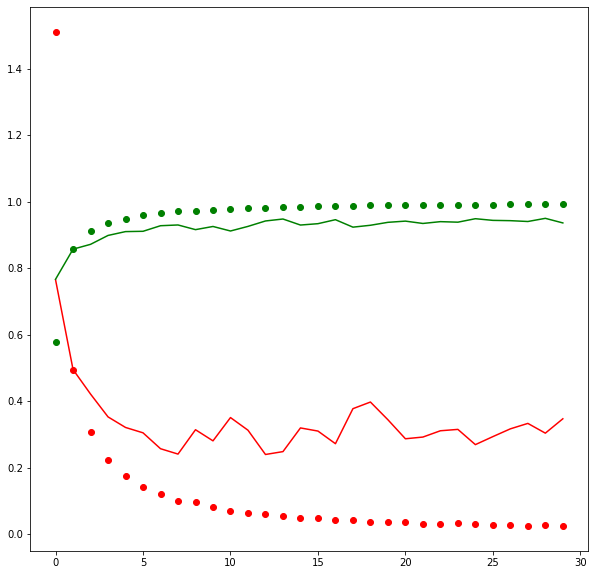

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(epochs, history.history['loss'], 'ro', label='Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Val loss')
plt.plot(epochs, history.history['accuracy'], 'go', label='Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='Val accuracy')

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Confusion Matrix

In [28]:
pred_class = np.argmax(cnn_seq.predict(x_test_gray_norm), axis=-1)

395/395 [==============================] - 2s 5ms/step


In [29]:
pred_class

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

Text(249.0, 0.5, 'Predicted')

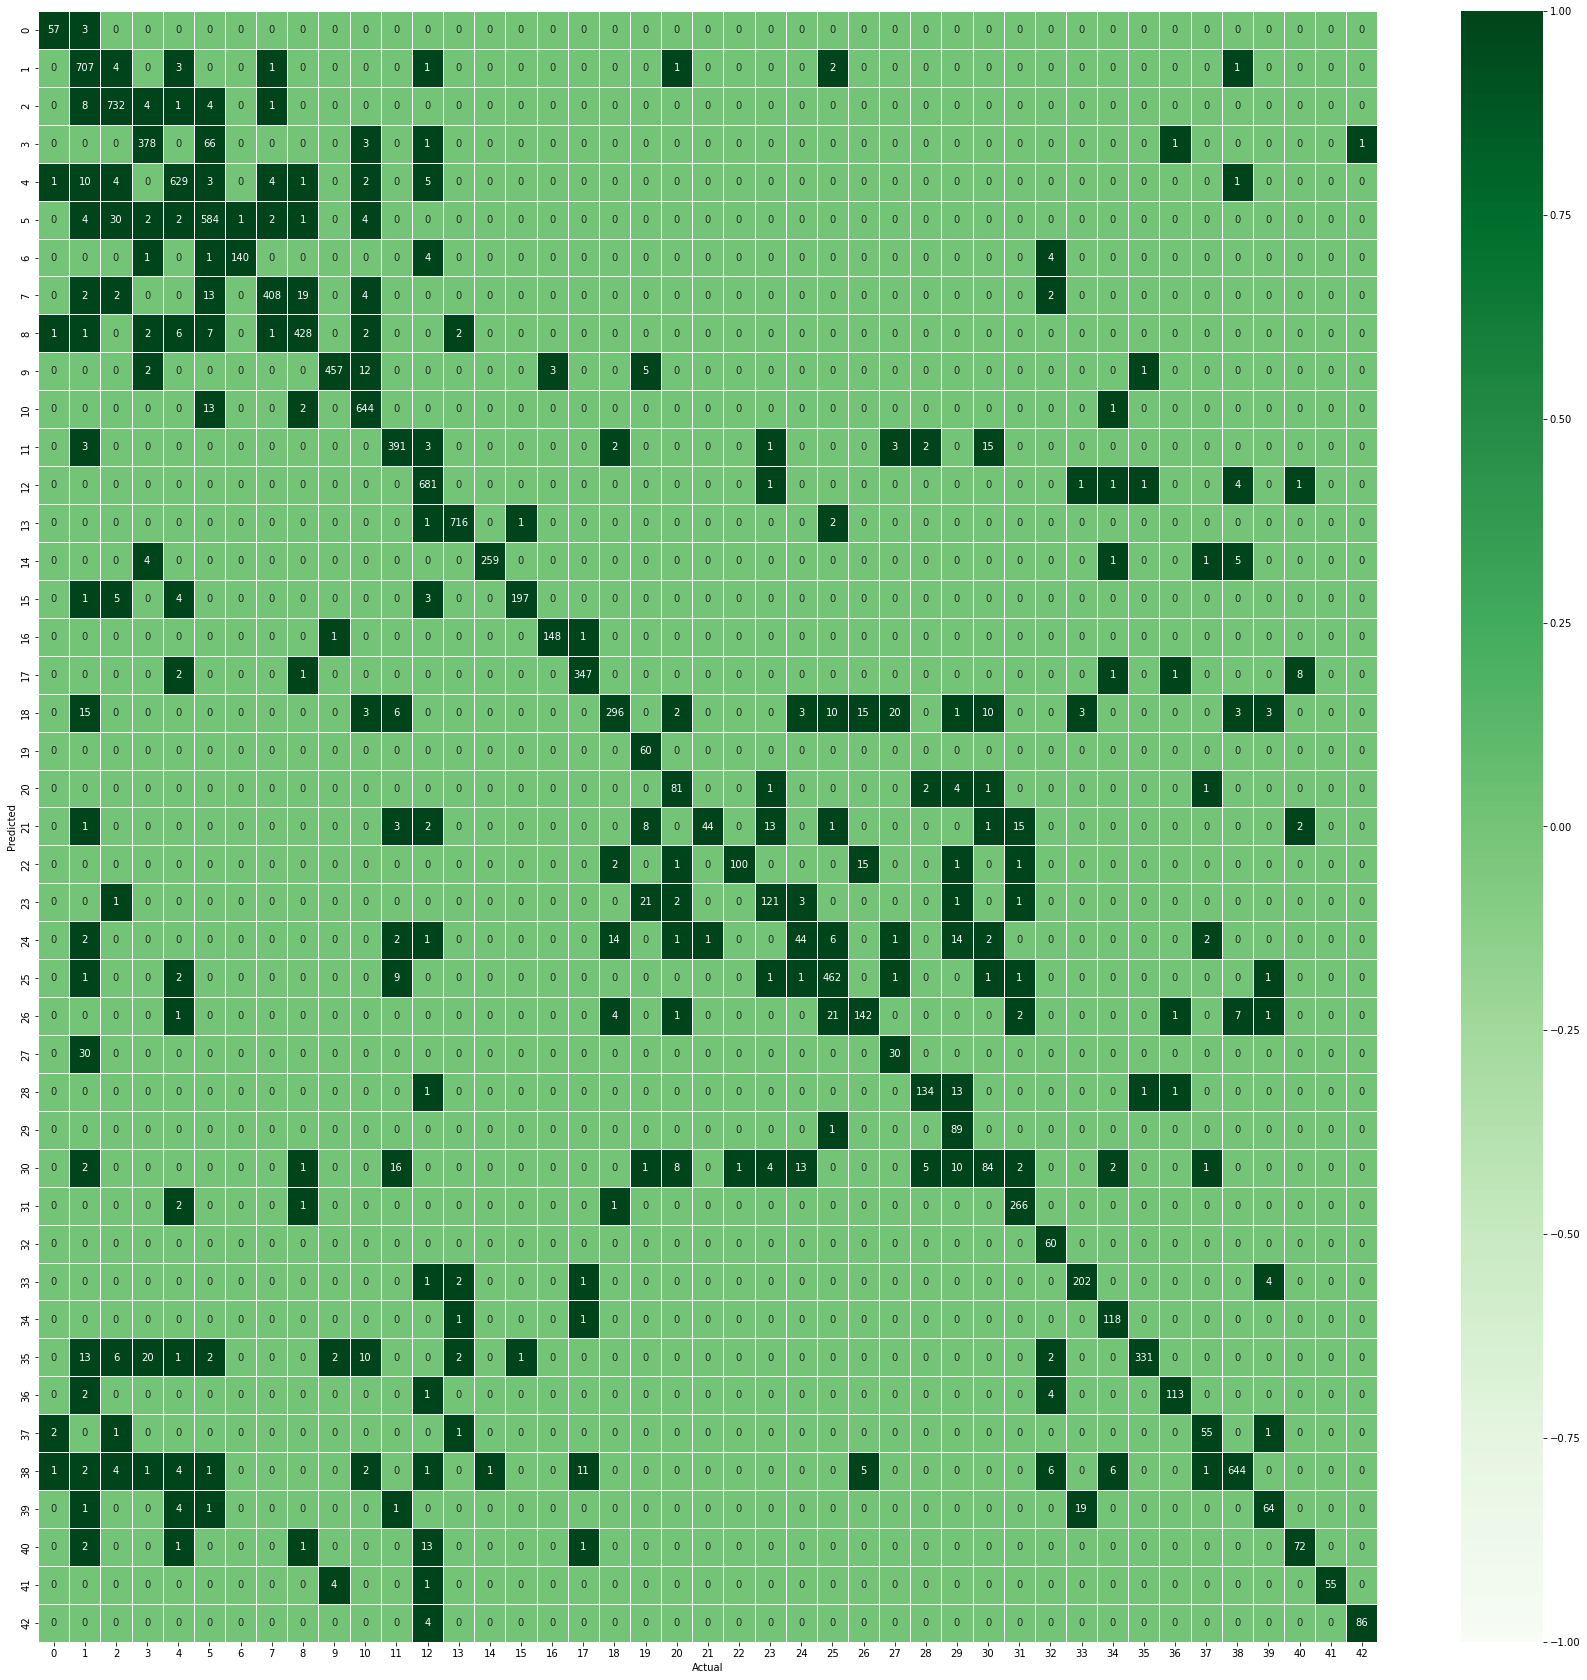

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_class)
plt.figure(figsize=(30,30))
sns.heatmap(cm, cmap='Greens', fmt='g', vmin=-1, vmax=1, annot=True, linewidth=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:darkorange"> Target class mapping

In [31]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

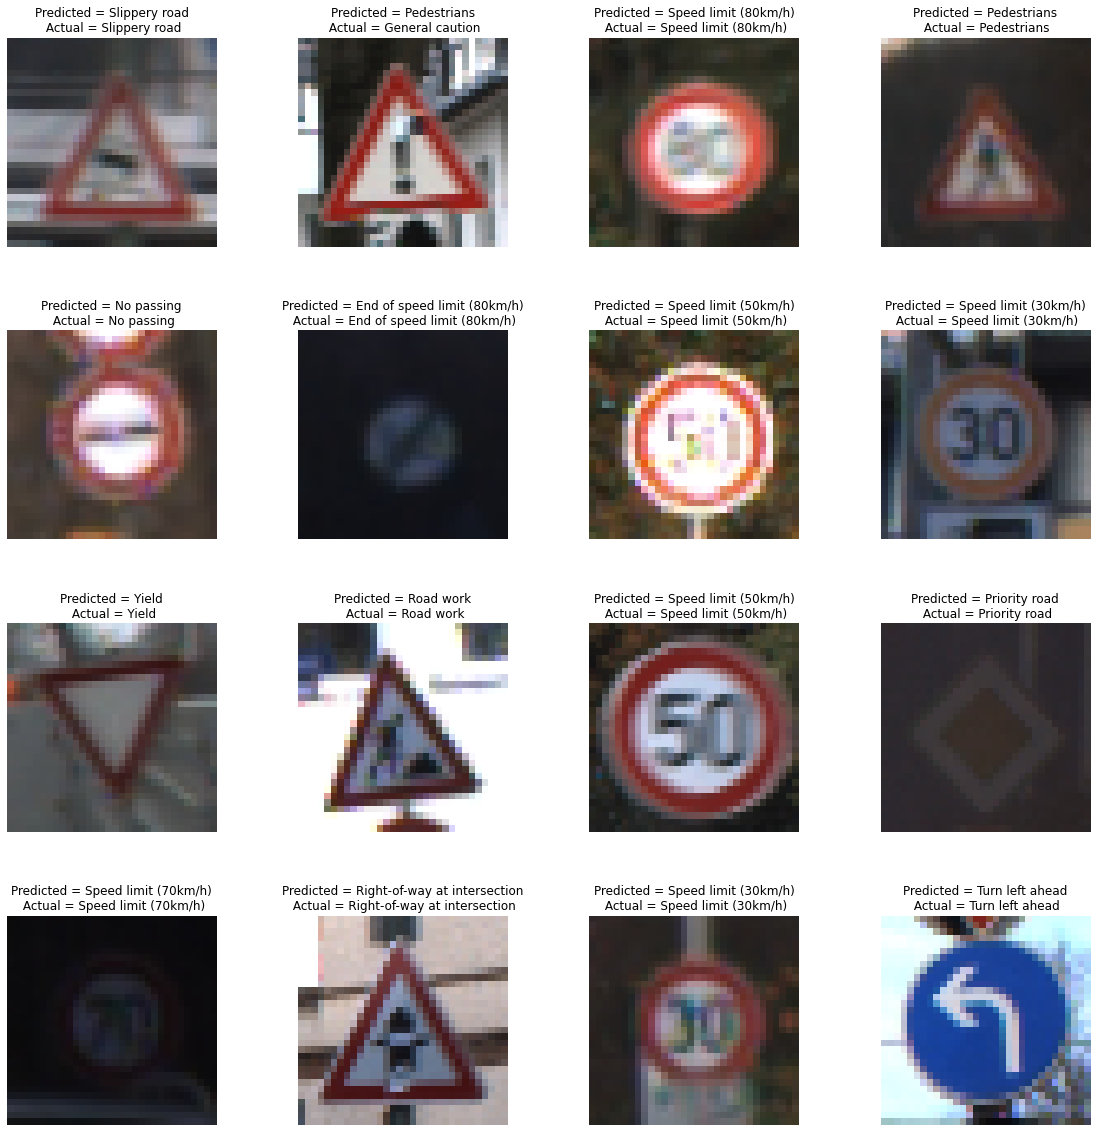

In [32]:
h_grid = 4
w_grid = 4

fig, axes = plt.subplots(h_grid, w_grid, figsize=(20,20))
axes = axes.ravel()

x_test_length = len(x_test)

for i in np.arange(0, w_grid * w_grid):
    number = np.random.randint(0, x_test_length)
    axes[i].imshow(x_test[number])
    axes[i].set_title('Predicted = {}\n Actual = {}'.format(classes.get(pred_class[number]), classes.get(y_test[number])))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.87      0.98      0.92       720
           2       0.93      0.98      0.95       750
           3       0.91      0.84      0.87       450
           4       0.95      0.95      0.95       660
           5       0.84      0.93      0.88       630
           6       0.99      0.93      0.96       150
           7       0.98      0.91      0.94       450
           8       0.94      0.95      0.95       450
           9       0.98      0.95      0.97       480
          10       0.94      0.98      0.96       660
          11       0.91      0.93      0.92       420
          12       0.94      0.99      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      0.96      0.98       270
          15       0.99      0.94      0.96       210
          16       0.98      0.99      0.98       150
          17       0.96    

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:black"> Model is giving low precision and low recall for class - 24, we should look at it

In [34]:
model_json = cnn_seq.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
cnn_seq.save_weights("model.h5")
print("Saved CNN model to disk")

Saved CNN model to disk


<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> CNN Tunning

In [79]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense,LeakyReLU, InputLayer, Conv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
LeakyReLU = LeakyReLU(alpha=0.1)

score_acc = make_scorer(accuracy_score)

In [98]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    print(f"{neurons}, {activation}, {optimizer}, {learning_rate}, {batch_size}, {epochs}, {layers1}, {layers2}, {normalization}, {dropout}, {dropout_rate}")
    36.29627854243603, 0.6121701756176187, 0.9907124646308787, 0.42602224734191213, 335.25580347650913, 43.6260243522301, 1.2983259142789796, 1.0449566490883235, 0.33765619188879237, 0.4360590193711702, 0.23077874175693686
    optimizerL = ['SGD', 'Adam']
    optimizerD = {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate)}
        
    activationL = ['relu', 'LeakyReLU']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(InputLayer(input_shape=(32, 32, 1)))
        nn.add(Conv2D(neurons, (5,5), activation=activation))
        nn.add(Conv2D(neurons, (4,4), activation=activation))
        nn.add(Dense(neurons, input_dim=84, activation=activation))
       # if normalization > 0.5:
       #     nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
      #  if dropout > 0.5:
      #      nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(43, activation='softmax'))
        nn.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_train_gray_norm, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score

In [99]:
params_nn2 ={
    'neurons': (32, 50),
    'activation':(0, 1),
    'optimizer':(0,1),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=1, n_iter=1)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
36.29627854243603, 0.6121701756176187, 0.9907124646308787, 0.42602224734191213, 335.25580347650913, 43.6260243522301, 1.2983259142789796, 1.0449566490883235, 0.33765619188879237, 0.4360590193711702, 0.23077874175693686


C:\Users\MSS\AppData\Local\Temp\ipykernel_896\3745505240.py:36: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/44
Epoch 1/44
Epoch 1/44
Epoch 1/44
Epoch 1/44
| 1         | nan       | 0.6122    | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 36.3      | 0.3377    | 0.9907    |


E:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSS\AppData\Roaming\Python\Python39\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\MSS\AppData\Roaming\Python\Python39\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [501]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False)
]

In [482]:
cnn_seq_updated = models.Sequential()

cnn_seq_updated.add(layers.Conv2D(6, (5,5), activation='relu'), input_shape=(32,32,1))
cnn_seq_updated.add(layers.MaxPooling2D(4,4))

cnn_seq_updated.add(layers.Dropout(0.2))

cnn_seq_updated.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq_updated.add(layers.MaxPooling2D(3,3))

cnn_seq_updated.add(layers.Flatten())

cnn_seq_updated.add(layers.Dense(120, activation='relu'))
cnn_seq_updated.add(layers.Dense(84, activation='relu'))

cnn_seq_updated.add(layers.Dense(43, activation='softmax'))

cnn_seq_updated.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_updated = cnn_seq_updated.fit(x_train_gray_norm, y_train, batch_size=50, epochs=100, 
                                      verbose=1, validation_data=(x_val_gray_norm, y_val), callbacks=callbacks)

Epoch 1/100
696/696 [==============================] - 28s 36ms/step - loss: 3.0590 - accuracy: 0.1581 - val_loss: 2.5794 - val_accuracy: 0.2789
Epoch 2/100
696/696 [==============================] - 25s 35ms/step - loss: 1.9992 - accuracy: 0.3987 - val_loss: 1.7609 - val_accuracy: 0.4730
Epoch 3/100
696/696 [==============================] - 24s 35ms/step - loss: 1.5122 - accuracy: 0.5326 - val_loss: 1.4390 - val_accuracy: 0.5943
Epoch 4/100
696/696 [==============================] - 24s 34ms/step - loss: 1.2645 - accuracy: 0.6057 - val_loss: 1.2531 - val_accuracy: 0.6499
Epoch 5/100
696/696 [==============================] - 25s 37ms/step - loss: 1.1245 - accuracy: 0.6506 - val_loss: 1.1343 - val_accuracy: 0.6857
Epoch 6/100
696/696 [==============================] - 24s 35ms/step - loss: 1.0261 - accuracy: 0.6837 - val_loss: 1.0500 - val_accuracy: 0.6952
Epoch 7/100
696/696 [==============================] - 24s 35ms/step - loss: 0.9351 - accuracy: 0.7105 - val_loss: 0.9914 - val_ac

In [483]:
cnn_seq_updated = models.Sequential()

cnn_seq_updated.add(layers.Conv2D(6, (5,5), activation='relu'))
cnn_seq_updated.add(layers.MaxPooling2D(4,4))

cnn_seq_updated.add(layers.Dropout(0.2))

cnn_seq_updated.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq_updated.add(layers.MaxPooling2D(3,3))

cnn_seq_updated.add(layers.Flatten())

cnn_seq_updated.add(layers.Dense(120, activation='relu'))
cnn_seq_updated.add(layers.Dense(84, activation='relu'))

cnn_seq_updated.add(layers.Dense(43, activation='softmax'))

cnn_seq_updated.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_updated = cnn_seq_updated.fit(x_train_gray_norm, y_train, batch_size=50, epochs=100, verbose=1, 
                                      validation_data=(x_val_gray_norm, y_val), callbacks=callbacks)

Epoch 1/100
696/696 [==============================] - 24s 32ms/step - loss: 3.5444 - accuracy: 0.0667 - val_loss: 3.5368 - val_accuracy: 0.0782
Epoch 2/100
696/696 [==============================] - 23s 33ms/step - loss: 3.3928 - accuracy: 0.0923 - val_loss: 3.5183 - val_accuracy: 0.0794
Epoch 3/100
696/696 [==============================] - 23s 33ms/step - loss: 3.3413 - accuracy: 0.1024 - val_loss: 3.4935 - val_accuracy: 0.0796
Epoch 4/100
696/696 [==============================] - 22s 32ms/step - loss: 3.2646 - accuracy: 0.1193 - val_loss: 3.4161 - val_accuracy: 0.1075
Epoch 5/100
696/696 [==============================] - 26s 38ms/step - loss: 3.1229 - accuracy: 0.1519 - val_loss: 3.2328 - val_accuracy: 0.1492
Epoch 6/100
696/696 [==============================] - 23s 33ms/step - loss: 2.9012 - accuracy: 0.2038 - val_loss: 2.9087 - val_accuracy: 0.2175
Epoch 7/100
696/696 [==============================] - 22s 32ms/step - loss: 2.6295 - accuracy: 0.2606 - val_loss: 2.6035 - val_ac

In [485]:
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
cnn_seq_updated = models.Sequential()

cnn_seq_updated.add(layers.Conv2D(6, (5,5), activation='relu'))
cnn_seq_updated.add(layers.MaxPooling2D(4,4))

cnn_seq_updated.add(layers.Dropout(0.2))

cnn_seq_updated.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq_updated.add(layers.MaxPooling2D(3,3))

cnn_seq_updated.add(layers.Flatten())

cnn_seq_updated.add(layers.Dense(120, activation='relu'))
cnn_seq_updated.add(layers.Dense(84, activation='relu'))

cnn_seq_updated.add(layers.Dense(43, activation='softmax'))

cnn_seq_updated.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_updated = cnn_seq_updated.fit(x_train_gray_norm, y_train, batch_size=50, epochs=30, 
                                      verbose=1, validation_data=(x_val_gray_norm, y_val), callbacks=callbacks)

Epoch 1/30
696/696 [==============================] - 26s 34ms/step - loss: 3.0736 - accuracy: 0.1497 - val_loss: 2.5459 - val_accuracy: 0.2828
Epoch 2/30
696/696 [==============================] - 24s 34ms/step - loss: 2.0679 - accuracy: 0.3839 - val_loss: 1.8632 - val_accuracy: 0.4678
Epoch 3/30
696/696 [==============================] - 23s 33ms/step - loss: 1.6410 - accuracy: 0.4969 - val_loss: 1.6121 - val_accuracy: 0.5358
Epoch 4/30
696/696 [==============================] - 24s 34ms/step - loss: 1.4185 - accuracy: 0.5650 - val_loss: 1.4955 - val_accuracy: 0.5880
Epoch 5/30
696/696 [==============================] - 23s 33ms/step - loss: 1.2652 - accuracy: 0.6073 - val_loss: 1.3712 - val_accuracy: 0.6293
Epoch 6/30
696/696 [==============================] - 23s 33ms/step - loss: 1.1513 - accuracy: 0.6449 - val_loss: 1.2710 - val_accuracy: 0.6601
Epoch 7/30
696/696 [==============================] - 23s 33ms/step - loss: 1.0695 - accuracy: 0.6730 - val_loss: 1.1985 - val_accuracy:

In [493]:
learning_rate = 0.0001
opt = Adam(learning_rate=learning_rate)
cnn_seq_updated = models.Sequential()

cnn_seq_updated.add(layers.Conv2D(6, (5,5), activation='relu'))
cnn_seq_updated.add(layers.AveragePooling2D())

cnn_seq_updated.add(layers.Dropout(0.2))

cnn_seq_updated.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq_updated.add(layers.AveragePooling2D())

cnn_seq_updated.add(layers.Flatten())

cnn_seq_updated.add(layers.Dense(120, activation='relu'))
cnn_seq_updated.add(layers.Dense(84, activation='relu'))

cnn_seq_updated.add(layers.Dense(43, activation='softmax'))

cnn_seq_updated.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_updated = cnn_seq_updated.fit(x_train_gray_norm, y_train, batch_size=50, epochs=30, 
                                      verbose=1, validation_data=(x_val_gray_norm, y_val), callbacks=callbacks)

Epoch 1/30
696/696 [==============================] - 40s 54ms/step - loss: 3.2191 - accuracy: 0.1564 - val_loss: 2.8820 - val_accuracy: 0.2859
Epoch 2/30
696/696 [==============================] - 36s 52ms/step - loss: 2.2109 - accuracy: 0.4036 - val_loss: 2.0329 - val_accuracy: 0.4277
Epoch 3/30
696/696 [==============================] - 36s 52ms/step - loss: 1.6233 - accuracy: 0.5361 - val_loss: 1.5584 - val_accuracy: 0.5748
Epoch 4/30
696/696 [==============================] - 36s 52ms/step - loss: 1.3156 - accuracy: 0.6194 - val_loss: 1.3168 - val_accuracy: 0.6075
Epoch 5/30
696/696 [==============================] - 36s 52ms/step - loss: 1.1202 - accuracy: 0.6719 - val_loss: 1.1471 - val_accuracy: 0.6812
Epoch 6/30
696/696 [==============================] - 36s 52ms/step - loss: 0.9872 - accuracy: 0.7133 - val_loss: 1.0388 - val_accuracy: 0.6998
Epoch 7/30
696/696 [==============================] - 36s 52ms/step - loss: 0.8824 - accuracy: 0.7439 - val_loss: 0.9346 - val_accuracy:

In [506]:
learning_rate = 0.1
#opt = Adam(learning_rate=learning_rate)
opt = SGD(learning_rate=learning_rate)
cnn_seq_updated = models.Sequential()

cnn_seq_updated.add(layers.Conv2D(6, (5,5), activation='relu'))
cnn_seq_updated.add(layers.AveragePooling2D())

cnn_seq_updated.add(layers.Dropout(0.2))

cnn_seq_updated.add(layers.Conv2D(16, (5,5), activation='relu'))
cnn_seq_updated.add(layers.AveragePooling2D())

cnn_seq_updated.add(layers.Flatten())

cnn_seq_updated.add(layers.Dense(120, activation='relu'))
cnn_seq_updated.add(layers.Dense(84, activation='relu'))

cnn_seq_updated.add(layers.Dense(43, activation='softmax'))

cnn_seq_updated.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_updated = cnn_seq_updated.fit(x_train_gray_norm, y_train, batch_size=32, epochs=30, 
                                      verbose=1, validation_data=(x_val_gray_norm, y_val))
#, callbacks=callbacks)

Epoch 1/30
1088/1088 [==============================] - 24s 20ms/step - loss: 1.8045 - accuracy: 0.4891 - val_loss: 0.7236 - val_accuracy: 0.7834
Epoch 2/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.4582 - accuracy: 0.8559 - val_loss: 0.4988 - val_accuracy: 0.8379
Epoch 3/30
1088/1088 [==============================] - 26s 24ms/step - loss: 0.2758 - accuracy: 0.9151 - val_loss: 0.4038 - val_accuracy: 0.8803
Epoch 4/30
1088/1088 [==============================] - 35s 32ms/step - loss: 0.1880 - accuracy: 0.9403 - val_loss: 0.4857 - val_accuracy: 0.8678
Epoch 5/30
1088/1088 [==============================] - 36s 33ms/step - loss: 0.1451 - accuracy: 0.9549 - val_loss: 0.3152 - val_accuracy: 0.9154
Epoch 6/30
1088/1088 [==============================] - 30s 27ms/step - loss: 0.1288 - accuracy: 0.9592 - val_loss: 0.3455 - val_accuracy: 0.9011
Epoch 7/30
1088/1088 [==============================] - 44s 40ms/step - loss: 0.1138 - accuracy: 0.9650 - val_loss: 0.3273 -

<span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Image Augmentation

In [500]:
import tensorflow as tf
tf.get_logger().setLevel(logging.INFO)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [469]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.15),
    layers.RandomTranslation(0.15, 0.15),
    layers.RandomFlip(),
    layers.RandomRotation(10, fill_mode='nearest'),
])

In [470]:
aug_cnn_seq = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 1)),
    data_augmentation,  
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.Conv2D(16, (5,5), activation='relu'),
    layers.AveragePooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, (5,5), activation='relu'),
    layers.AveragePooling2D(),    
    layers.Flatten(),
    layers.Dense(160, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(43, activation='softmax')])

In [471]:
aug_cnn_seq.summary()

Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_131 (Sequential)  (None, 32, 32, 1)        0         
                                                                 
 conv2d_180 (Conv2D)         (None, 28, 28, 16)        416       
                                                                 
 conv2d_181 (Conv2D)         (None, 24, 24, 16)        6416      
                                                                 
 average_pooling2d_171 (Aver  (None, 12, 12, 16)       0         
 agePooling2D)                                                   
                                                                 
 dropout_78 (Dropout)        (None, 12, 12, 16)        0         
                                                                 
 conv2d_182 (Conv2D)         (None, 8, 8, 32)          12832     
                                                    

In [472]:
total_epochs = 2
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)

In [473]:
aug_cnn_seq.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [474]:
history_with_aug = aug_cnn_seq.fit(x_train_gray_norm, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(x_val_gray_norm, y_val))

Epoch 1/30


1088/1088 [==============================] - 119s 103ms/step - loss: 3.3068 - accuracy: 0.1032 - val_loss: 2.9651 - val_accuracy: 0.1785
Epoch 2/30
1088/1088 [==============================] - 117s 108ms/step - loss: 2.4182 - accuracy: 0.2845 - val_loss: 2.1775 - val_accuracy: 0.3528
Epoch 3/30
1088/1088 [==============================] - 119s 109ms/step - loss: 1.7243 - accuracy: 0.4444 - val_loss: 1.7013 - val_accuracy: 0.4746
Epoch 4/30
1088/1088 [==============================] - 117s 107ms/step - loss: 1.4501 - accuracy: 0.5183 - val_loss: 1.4688 - val_accuracy: 0.5392
Epoch 5/30
1088/1088 [==============================] - 116s 107ms/step - loss: 1.2958 - accuracy: 0.5637 - val_loss: 1.6476 - val_accuracy: 0.5068
Epoch 6/30
1088/1088 [==============================] - 118s 108ms/step - loss: 1.1704 - accuracy: 0.6041 - val_loss: 1.2986 - val_accuracy: 0.6288
Epoch 7/30
1088/1088 [==============================] - 118s 109ms/step - loss: 1.0910 - accuracy: 0.6320 - val_loss: 1.317

In [420]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [424]:
history_with_aug = cnn_seq.fit(aug.flow(x_train_gray_norm, y_train, batch_size=32), epochs=10, validation_data=(x_val_gray_norm, y_val))

Epoch 1/10
1088/1088 [==============================] - 22s 20ms/step - loss: 1.4409 - accuracy: 0.5702 - val_loss: 0.8886 - val_accuracy: 0.7340
Epoch 2/10
1088/1088 [==============================] - 24s 22ms/step - loss: 1.0076 - accuracy: 0.6953 - val_loss: 0.7338 - val_accuracy: 0.7664
Epoch 3/10
1088/1088 [==============================] - 24s 22ms/step - loss: 0.7761 - accuracy: 0.7639 - val_loss: 0.6044 - val_accuracy: 0.8177
Epoch 4/10
1088/1088 [==============================] - 24s 22ms/step - loss: 0.6519 - accuracy: 0.7970 - val_loss: 0.5213 - val_accuracy: 0.8490
Epoch 5/10
1088/1088 [==============================] - 23s 21ms/step - loss: 0.5615 - accuracy: 0.8258 - val_loss: 0.4214 - val_accuracy: 0.8766
Epoch 6/10
1088/1088 [==============================] - 24s 22ms/step - loss: 0.5029 - accuracy: 0.8444 - val_loss: 0.4441 - val_accuracy: 0.8819
Epoch 7/10
1088/1088 [==============================] - 24s 22ms/step - loss: 0.4566 - accuracy: 0.8592 - val_loss: 0.4014 -